## Feature Scaling

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Scaling to vector unit  length**.

=================================================================

## Scaling to vector unit  length / unit norm

In this procedure we scale the components of a feature vector such that the complete vector has a length of 1 or, in other words a norm of 1. **Note** that this normalisation procedure normalises the **feature** vector, and not the **observation** vector. So we divide by the norm of the feature vector, observation per observation, across the different variables, and not by the norm of the **observation** vector, across observations for the same feature.

First, let me give you the formulas, and then I illustrate with an example.

### Scaling to unit norm, formulas

Scaling to unit norm is achieved by dividing each feature vector by either the Manhattan distance (l1 norm) or the Euclidean distance of the vector (l2 norm):

X_scaled_l1 = X / l1(X)

X_scaled_l2 = X / l2(X)


The **Manhattan distance** is given by the sum of the absolute components of the vector:

l1(X) = |x1| + |x2| + ... + |xn|


Whereas the **Euclidean distance** is given by the square root of the square sum of the component of the vector:

l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )


In the above example, x1 is variable 1, x2 variable 2, and xn variable n, and X is the data for 1 observation across variables (a row in other words).

**Note** as well that as the euclidean distance squares the values of the feature vector components, outliers have a heavier weight. With outliers, we may prefer to use l1 normalisation.


### Scaling to unit norm, examples

For example, if our data has 1 observations (1 row) and 3 variables:

- number of pets
- number of children
- age

The values for each variable for that single observation are 10, 15 and 20. Our vector X = [10, 15, 20]. Then:

l1(X) = 10 + 15 + 20 = 45

l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**

The euclidean distance is always smaller than the manhattan distance.


The normalised vector values are therefore:

X_scaled_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]

X_scaled_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]


Scikit-learn recommends this scaling procedures for text classification or clustering. For example, they quote the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataset for the demo
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for robust scaling
from sklearn.preprocessing import Normalizer

In [2]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

When scaling to unit length, as we do it across the variables and observation per observation, the distance does vary for each observation. Therefore, we do not need to learn parameters and store them. The scaling occurs on an observation per observation level. Therefore, in essence, we do not need to divide into train and test.

However, you probably did this to implement other feature engineering steps, so let's continue doing so here as well.

In [3]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

### Scaling to l1

In [4]:
# set up the scaler
scaler = Normalizer(norm='l1').set_output(transform="pandas")

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# let's calculate the norm for each observation (feature vector)
# original data

np.round(np.linalg.norm(X_train, ord=1, axis=1), 1)

array([ 411.8, 1049.1, 1573.6, ...,  903.1, 1251. , 1197.2])

In [6]:
# let's calculate the norm for each observation (feature vector)
# scaled data

np.round(np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)

array([1., 1., 1., ..., 1., 1., 1.])

Now, each feature vector has a l1 norm of 1.

In [7]:
# let's look at the individual values of the variables in the original data

X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.003307,0.025618,0.004845,0.000980,0.829530,0.002471,0.030689,-0.102560
std,0.003101,0.021863,0.006238,0.001385,0.115177,0.002263,0.020812,0.068250
min,0.000072,0.000209,0.000147,0.000028,0.016782,0.000163,0.000930,-0.691357
25%,0.001554,0.011168,0.002548,0.000549,0.795538,0.001473,0.018314,-0.121284
50%,0.002535,0.020402,0.003785,0.000772,0.854378,0.002075,0.026044,-0.087644
75%,0.004005,0.033935,0.005554,0.001074,0.899395,0.002862,0.036334,-0.062273
max,0.065525,0.236108,0.329271,0.084637,0.994950,0.119789,0.206662,-0.003274


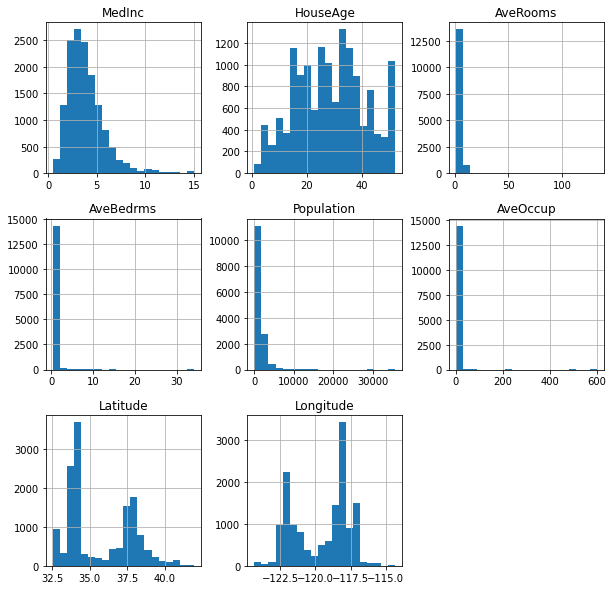

In [8]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

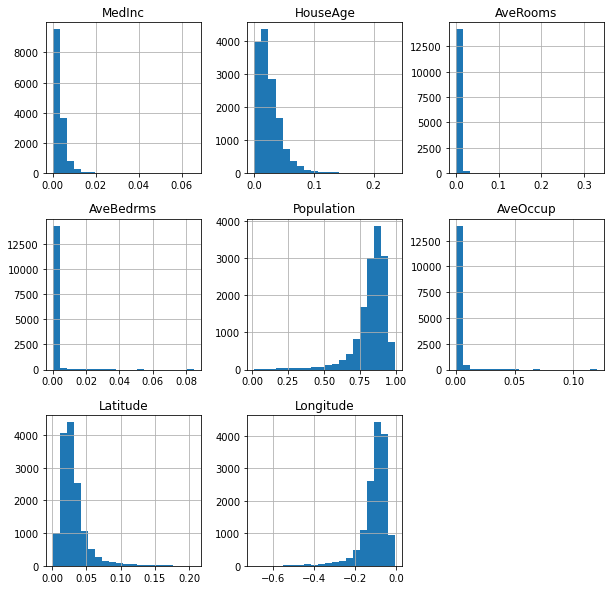

In [9]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

See how this normalisation changes the distribution of the original variable quite dramatically.

### Scaling to l2

In [10]:
# set up the scaler
scaler = Normalizer(norm='l2').set_output(transform="pandas")

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# let's calculate the norm for each observation (feature vector)
# original data

np.round( np.linalg.norm(X_train, ord=2, axis=1), 1)

array([ 236. ,  846.8, 1392.6, ...,  716.1, 1059.7, 1031.1])

In [12]:
# let's calculate the norm for each observation (feature vector)
# scaledl data

np.round( np.linalg.norm(X_train_scaled, ord=2, axis=1), 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [13]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.004258,0.033325,0.006370,0.001292,0.978428,0.003174,0.039616,-0.132217
std,0.005068,0.036131,0.011609,0.002634,0.074459,0.003599,0.036169,0.118785
min,0.000072,0.000212,0.000148,0.000028,0.024116,0.000164,0.000935,-0.957531
25%,0.001745,0.012462,0.002841,0.000610,0.986614,0.001650,0.020339,-0.150302
50%,0.002983,0.023740,0.004415,0.000900,0.993908,0.002423,0.030343,-0.101977
75%,0.004940,0.041784,0.006860,0.001330,0.997267,0.003535,0.045020,-0.069048
max,0.113007,0.392072,0.687806,0.176795,0.999994,0.141353,0.295699,-0.003291


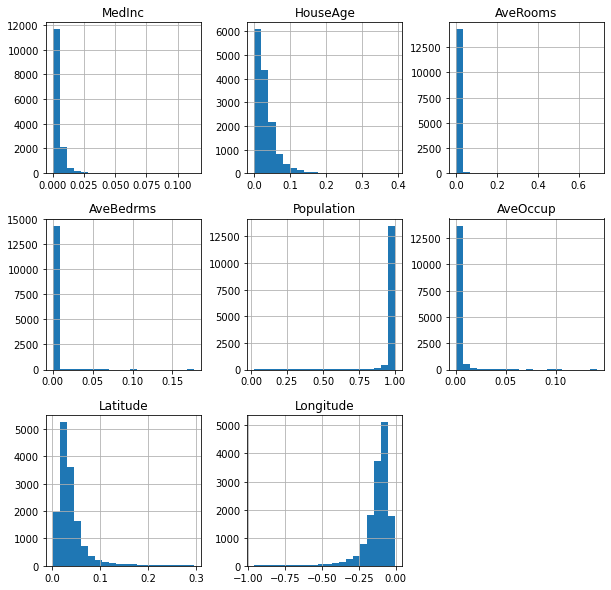

In [14]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()